In [2]:
''' 
!pip install numpy
!pip install matplotlib
!pip install pandas
!pip install openpyxl
!pip install networkx
'''

' \n!pip install numpy\n!pip install matplotlib\n!pip install pandas\n!pip install openpyxl\n!pip install networkx\n'

In [3]:
#!python.exe -m pip install --upgrade pip

#Set, Parameters

In [1]:
import pandas as pd

# Carregar o arquivo Excel
#file_path = "H:/Meu Drive/UFSCar/2024.1/1. Projeto de Monografia/9. CPLEX/Data/dados.xlsx"
#file_path = "H:/Meu Drive/UFSCar/2024.1/1. Projeto de Monografia/9. CPLEX/Data/dados_poucos_18_22.xlsx"
file_path = "H:/Meu Drive/UFSCar/2024.1/1. Projeto de Monografia/9. CPLEX/Data/dados_poucos - Copia.xlsx"
#file_path = "H:/Meu Drive/UFSCar/2024.1/1. Projeto de Monografia/9. CPLEX/Data/dados_grande_sp.xlsx"
df = pd.read_excel(file_path,sheet_name="Sheet1")

# Exibir o conteúdo do DataFrame
#print(df)


N=df['Tarefa'].to_list()

#latitude x longitude y
coord_x = df['Latitude'].to_list()
coord_y = df['Longitude'].to_list()

o=df['Obrigatoriedade'].to_list()
p=df['Prioridade'].to_list()
ts=df['Tempo de Setup'].to_list()
tp=df['Tempo de Processamento'].to_list()
print(' Obrigatórias:',sum(o),'\n Não obrigatórias:',len(o)-sum(o))

K = [0,1,2]
#[0,1,2,3,4,5,6]
col=['Equipe A','Equipe B','Equipe C']
#['Equipe A','Equipe B','Equipe C','Equipe D','Equipe E','Equipe F','Equipe G']

h=df[col].values.tolist()

 Obrigatórias: 15 
 Não obrigatórias: 11


In [2]:
df

,Tarefa,Local,Latitude,Longitude,Obrigatoriedade,Prioridade,Tempo de Setup,Tempo de Processamento,Horário de Início,Horário Final,Equipe A,Equipe B,Equipe C,Equipe D,Equipe E,Equipe F,Unnamed: 16
0,0,Base,-23.545801,-46.650884,1,0,0.0,0.0,NaN,NaN,1,1,1,1,1,0,NaN
1,1,Ibirapuera Park,-23.527416,-46.717634,0,7,50.0,50.0,08:00,18:00,0,1,1,0,0,0,NaN
2,2,São Paulo Cathedral,-23.550520,-46.633308,0,3,50.0,112.5,10:00,18:00,0,1,1,0,0,1,NaN
3,3,Municipal Market,-23.541144,-46.627816,1,8,50.0,75.0,08:00,18:00,0,1,0,1,1,1,NaN
4,4,Liberdade,-23.558557,-46.634369,1,6,37.5,62.5,08:00,13:30,1,1,1,1,1,1,NaN
5,5,Pinacoteca do Estado,-23.534310,-46.633853,1,5,50.0,100.0,08:00,12:00,0,1,1,1,1,0,NaN
6,6,Museum of Art of São Paulo (MASP),-23.561414,-46.655881,1,7,40.0,112.5,08:00,18:00,1,0,1,0,1,0,NaN
7,7,Municipal Theatre of São Paulo,-23.545614,-46.638369,0,3,37.5,75.0,10:00,18:00,1,0,0,1,1,1,NaN
8,8,Football Museum,-23.547432,-46.665842,1,8,50.0,50.0,08:00,18:00,1,1,1,1,0,0,NaN
9,9,Villa-Lobos Park,-23.545632,-46.722789,1,6,42.5,52.5,08:00,13:30,0,1,1,0,1,1,NaN


# Mapa

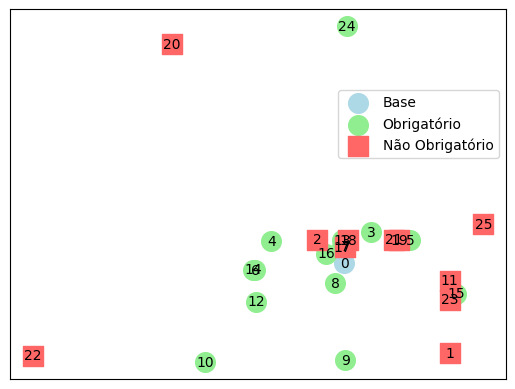

In [5]:
import networkx as nx
import matplotlib.pyplot as plt

def desenhar_mapa_inicial():
    # Criando o dicionário pos usando CoordX e CoordY como valores de posição
    pos = {i: (coord_x[i], coord_y[i]) for i in range(len(coord_x))}
        
    G = nx.Graph()

    # Adicionando nós para cada tarefa sem arestas
    for i in range(len(coord_x)):  
        G.add_node(i)

    # Separando os nós obrigatórios e não obrigatórios
    obrigatorios = [i for i in range(len(coord_x)) if o[i] == 1 and i!=0]
    nao_obrigatorios = [i for i in range(len(coord_x)) if o[i] == 0]
    base=[0]

    # Desenhando os nós obrigatórios (redondos)
    nx.draw_networkx_nodes(G, pos, nodelist=base, node_size=200, node_color="lightblue", node_shape="o", label='Base')
    nx.draw_networkx_nodes(G, pos, nodelist=obrigatorios, node_size=200, node_color="lightgreen", node_shape="o", label='Obrigatório')
    nx.draw_networkx_nodes(G, pos, nodelist=nao_obrigatorios, node_size=200, node_color="#FF6666", node_shape="s", label='Não Obrigatório')
    

    

    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")

    # Adicionando a legenda
    plt.legend(scatterpoints=1, loc='best',bbox_to_anchor=(1, 0.8))
    
    #plt.title("Mapa Inicial")
    plt.show()

# Desenhar o mapa inicial apenas com os nós e suas posições
desenhar_mapa_inicial()

In [6]:
def desenhar_solucao(equipes, coord_x, coord_y):
    # Criando o dicionário `pos` usando `CoordX` e `CoordY` como valores de posição
    pos = {i: (coord_x[i], coord_y[i]) for i in range(len(coord_x))}
        
    G = nx.DiGraph()

    # Adicionando nós para cada tarefa
    for i in range(len(coord_x)):  
        G.add_node(i)

    # Adicionando as arestas conforme a solução fornecida
    cores = ["yellow", "orange", "purple", "orange", "purple", "brown", "pink", "gray"]
    labels = col

    for k, (equipe, edges) in enumerate(equipes.items()):
        G.add_edges_from(edges, color=cores[k], label=labels[k])

    # Extraindo as cores das arestas
    edges = G.edges()
    colors = [G[u][v]["color"] for u, v in edges]

    # Desenhando os nós obrigatórios (redondos)
    obrigatorios = [i for i in range(len(coord_x)) if o[i] == 1 and i != 0]
    nao_obrigatorios = [i for i in range(len(coord_x)) if o[i] == 0]
    base = [0]

    nx.draw_networkx_nodes(G, pos, nodelist=base, node_size=200, node_color="lightblue", node_shape="o", label='Base')
    nx.draw_networkx_nodes(G, pos, nodelist=obrigatorios, node_size=200, node_color="lightgreen", node_shape="o", label='Obrigatório')
    nx.draw_networkx_nodes(G, pos, nodelist=nao_obrigatorios, node_size=200, node_color="#FF6666", node_shape="s", label='Não Obrigatório')

    # Desenhando os rótulos dos nós
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    
    # Desenhando as arestas com cores diferentes por equipe
    nx.draw_networkx_edges(G, pos, edgelist=edges, edge_color=colors, width=2)
    
    # Legenda manual
    for i, label in enumerate(labels):
        plt.plot([], [], color=cores[i], label=label)
        plt.legend(loc="upper left", fontsize=9,bbox_to_anchor=(1, 0.8))
    
    #plt.title("Solução de Roteamento por Equipe")
    plt.show()

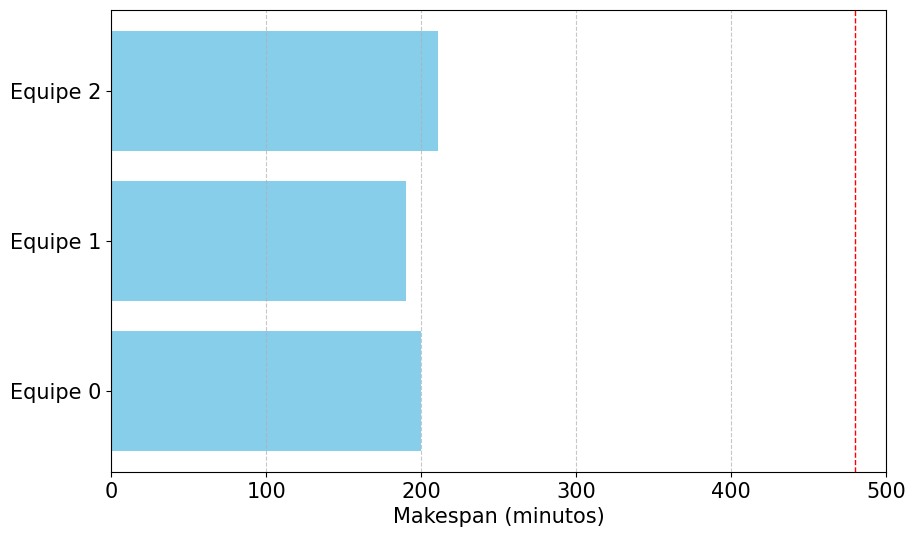

In [7]:
import matplotlib.pyplot as plt

# Extract the makespan values for each team
makespan_values = [200,190,211]
#160,155,171

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.xlim(0, 500)
plt.xticks(fontsize=15)
plt.axvline(x=480, color='red', linestyle='--', linewidth=1, label='Expediente')
plt.barh(range(len(K)), makespan_values, color='skyblue')
plt.yticks(range(len(K)), [f'Equipe {k}' for k in K], fontsize=15)
plt.xlabel('Makespan (minutos)', fontsize=15)
#plt.title('Makespan das Equipes', fontsize=18)
plt.grid(axis='x', linestyle='--', alpha=0.7,)
plt.show()

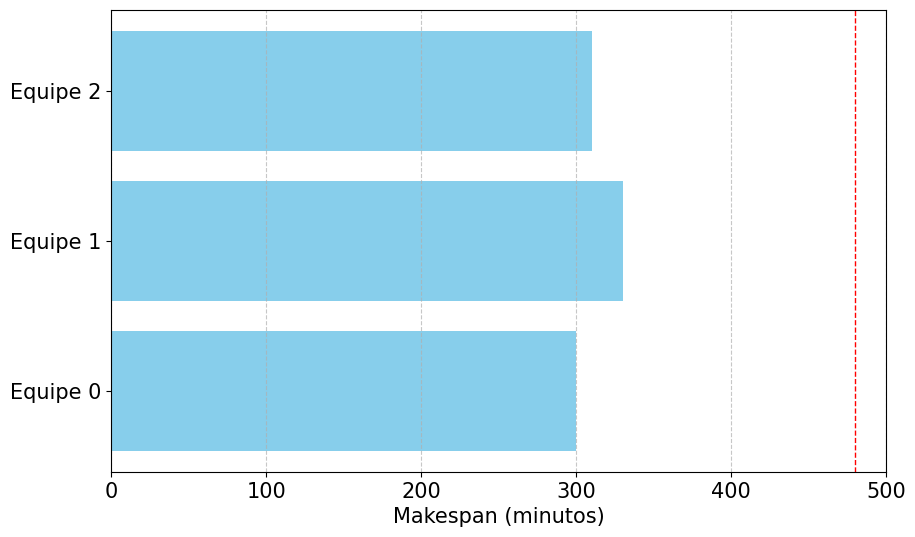

In [8]:
import matplotlib.pyplot as plt

# Extract the makespan values for each team
makespan_values = [300,330,310]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.xlim(0, 500)
plt.xticks(fontsize=15)
plt.axvline(x=480, color='red', linestyle='--', linewidth=1, label='Expediente')
plt.barh(range(len(K)), makespan_values, color='skyblue')
plt.yticks(range(len(K)), [f'Equipe {k}' for k in K], fontsize=15)
plt.xlabel('Makespan (minutos)', fontsize=15)
#plt.title('Makespan das Equipes', fontsize=18)
plt.grid(axis='x', linestyle='--', alpha=0.7,)
plt.show()

In [9]:
import numpy as np
np.sqrt((coord_x[2] - coord_x[7])**2 + (coord_y[2] - coord_y[7])**2)

np.float64(0.0070485854609248135)

# Distâncias

In [10]:
from math import radians, sin, cos, sqrt, atan2
import numpy as np

def haversine(lat1, lon1, lat2, lon2):
    # Raio médio da Terra em km
    R = 6371.0

    # Converter coordenadas de graus para radianos
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Diferenças das coordenadas
    dlat = lat2 - lat1
    dlon = lon2 - lon1

    # Fórmula de Haversine
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    # Distância
    distance = R * c
    return distance

# Número de nós
num_nos = len(coord_x)

# Inicializando a matriz de distâncias
d = np.zeros((num_nos, num_nos))

# Calculando a distância euclidiana entre cada par de nós
for i in range(num_nos):
    for j in range(num_nos):
        d[i][j]=round(haversine(coord_x[i], coord_y[i], coord_x[j], coord_y[j]),2)
#        d[i][j] = int(np.sqrt((coord_x[i] - coord_x[j])**2 + (coord_y[i] - coord_y[j])**2))

df_d = pd.DataFrame(d,index=N,columns=N)

# Tempo de Viagem

In [11]:
vel_media = 40  # km/h
tt = ((d / vel_media) * 60).round(2)  # em minutos

df_tt = pd.DataFrame(tt,index=N,columns=N)

# Tempo: Viagem + (Setup) + Processamento 

In [12]:
df_t=pd.DataFrame(index=N,columns=N)

for i in range(len(N)):
  for j in range(len(N)):
    if i==j:
      df_t.iloc[i, j]=0
    elif d[i][j]>=100:
       df_t.iloc[i, j]=tt[i][j] + ts[j] + tp[j]
    else:
       df_t.iloc[i, j]=tt[i][j] + tp[j]

def t(i,j):
  return df_t.iloc[i,j]

t = df_t.values.tolist()

## Closest Neighbor

In [13]:
import pandas as pd
import numpy as np

def nearest_neighbor_with_team_capabilities(distances_df, tasks_df):
    
    # Filtra as tarefas obrigatórias
    mandatory_tasks = tasks_df[tasks_df['Obrigatoriedade'] == 1]
    mandatory_task_indices = mandatory_tasks.index.tolist()
    
    # Inicializa a lista de rotas para as equipes
    routes = {team: [0] for team in col}
    
    # Dicionário para registrar quais tarefas foram feitas por qual equipe
    team_assigned_tasks = {team: [] for team in col}
    
    # Lista de tarefas já visitadas
    visited_tasks = set([0])
    
    # Alocação de tarefas
    while len(visited_tasks) < len(mandatory_tasks):
        for team in col:
            last_task = routes[team][-1]
            
            # Encontrar o vizinho mais próximo para a equipe
            closest_task = None
            min_distance = float('inf')
            
            for task in mandatory_task_indices:
                if task not in visited_tasks and tasks_df.loc[task, team] == 1:
                    dist = distances_df.loc[last_task, task]
                    if dist < min_distance:
                        min_distance = dist
                        closest_task = task
            
            if closest_task is not None:
                # Adiciona a tarefa à rota da equipe
                routes[team].append(closest_task)
                visited_tasks.add(closest_task)
                team_assigned_tasks[team].append(closest_task)
    
    # Retorno ao ponto inicial
    for team in col:
        routes[team].append(0)  # Retorna ao depot (tarefa 0)
    
    return routes, team_assigned_tasks


# Chama a função para obter as rotas
routes, team_assigned_tasks = nearest_neighbor_with_team_capabilities(df_d, df)

# Imprime as rotas
print("Rotas geradas pelo algoritmo de vizinho mais próximo:")
for team, route in routes.items():
    print(f"Rota {team}: {route}")

# Imprime as tarefas atribuídas para cada equipe
print("\nTarefas atribuídas para cada equipe:")
for team, assigned_tasks in team_assigned_tasks.items():
    print(f"{team}: {assigned_tasks}")

# transformando tupla em lista
sol_closest_neighbor=nearest_neighbor_with_team_capabilities(df_d, df)
sol_closest_neighbor=list(sol_closest_neighbor[0].values())

Rotas geradas pelo algoritmo de vizinho mais próximo:
Rota Equipe A: [0, 16, 4, 14, 15, 10, 0]
Rota Equipe B: [0, 17, 13, 3, 12, 24, 0]
Rota Equipe C: [0, 8, 6, 5, 9, 0]

Tarefas atribuídas para cada equipe:
Equipe A: [16, 4, 14, 15, 10]
Equipe B: [17, 13, 3, 12, 24]
Equipe C: [8, 6, 5, 9]


In [14]:
# Makespan
makespan = max([sum([t[i][j] for i, j in zip(route, route[1:])]) for route in sol_closest_neighbor])
print("Makespan:", makespan)

Makespan: 483.4200000000001


# CPLEX

In [15]:
#!pip install docplex
#!pip install matplotlib
#!pip install networkx

In [16]:
from docplex.mp.model import Model
import docplex.cp.solver.solver as solver
from itertools import combinations

In [17]:
mdl = Model("FTSP")

xv = {(i, j, k): mdl.binary_var(name=f"x_{i}_{j}_{k}")
     for i in N for j in N for k in K}

yv = {(i, k): mdl.binary_var(name=f"y_{i}_{k}") for i in N for k in K}
#yv.ub = 8

mv = {(k): mdl.continuous_var(name=f"m_{k}") for k in K}

uv = {(i): mdl.continuous_var(name=f"u_{i}") for i in N}

mdl

docplex.mp.Model['FTSP']

#Restrições VRP

In [18]:
#relacão entre x e y - ok 3
for i in N:
      if i != 0:
        for k in K:
          mdl.add_constraint(yv[i, k] == mdl.sum(xv[i, j, k] for j in N if j != i), f"constraint_y_{i}_{k}")  

#cada tarefa i é realizada por uma equipe k e sucedida por 1 tarefa j - ok 5
for i in N:
  if i != 0 and o[i] == 1:
    mdl.add_constraint(mdl.sum(xv[i,j,k] for k in K for j in N) == 1)

#cada equipe k sai e chega 1 vez na base - saída ok 4
for k in K:
    mdl.add_constraint(mdl.sum(xv[0, j, k] for j in N if j != 0) == 1, f"constraint_y_{0}_{k}")
    mdl.add_constraint(mdl.sum(xv[i, 0, k] for i in N if i != 0) == 1)

#balanceamento entre entradas e saidas - ok 6
for k in K:
    for i in N:
        if i != 0:
         mdl.add_constraint(mdl.sum(xv[j, i, k] for j in N if j != i) ==
                           mdl.sum(xv[i, j, k] for j in N if j != i), f"constraint_x_{i}_{k}")

#calculo makespan - ok 8
for k in K:
    mdl.add_constraint(mdl.sum(xv[i, j, k] * t[i][j] for i in N for j in N if j != i) == mv[k])


#expediente (8 horas) - ok 9
#for k in K:
#    mdl.add_constraint(mv[k] <= 480)

#previne arcos ii - ok 11
for k in K:
    for i in N:
            mdl.add_constraint(xv[i, i, k] == 0)

#mtz - subtour elimination - ok 7
n=len(N)
for k in K:
    for i in N:
        for j in N:
            if i != j and i != 0 and j != 0:
                mdl.add_constraint(uv[i]-uv[j]+n*xv[i,j,k] <= n-1)

#habilidades - ok
for i in N:
    if i != 0:
        for k in K:
            mdl.add_constraint(yv[i,k] <= h[i][k])

#desativar tarefas não obrigatórias - ok 10
for i in N:
    if i != 0 and o[i] == 0:
        for k in K:
            mdl.add_constraint(yv[i,k] == 0)

In [19]:
#mdl.export_as_lp('teste.lp')

#Função Objetivo

In [20]:
mdl.minimize(mdl.max(mv[k] for k in K))

In [21]:
# Criando a solução inicial para o CPLEX com base na solução de vizinho mais próximo
warm_start = mdl.new_solution()
for k, route in enumerate(sol_closest_neighbor):
    for i in range(len(route) - 1):
        warm_start.add_var_value(xv[route[i], route[i+1], k], 1)

# Adicionando a solução como warm start ao CPLEX
mdl.add_mip_start(warm_start)

docplex.mp.solution.SolveSolution(obj=N/A,values={x_0_16_0:1,x_16_4_0:1,..

In [58]:
#print(warm_start)

#Solução

In [23]:
mdl.context.solver.log_output = True
solution = mdl.solve(time_limit=500)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d


CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               500
Reduced MIP has 2166 rows, 2142 columns, and 14499 nonzeros.
Reduced MIP has 2109 binaries, 0 generals, 0 SOSs, and 3 indicators.
Presolve time = 0.03 sec. (0.80 ticks)
1 of 1 MIP starts provided solutions.
MIP start 'm1' defined initial solution with objective 483.4200.
Tried aggregator 2 times.
MIP Presolve eliminated 1414 rows and 1802 columns.
MIP Presolve modified 453 coefficients.
Aggregator did 3 substitutions.
Reduced MIP has 749 rows, 332 columns, and 2825 nonzeros.
Reduced MIP has 303 binaries, 0 generals, 0 SOSs, and 3 indicators.
Presolve time = 0.09 sec. (6.07 ticks)
Probing time = 0.03 sec. (1.77 ticks)
Cover probing fixed 0 vars, tightened 7 bounds.
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve added 55 rows and 0 columns.
Reduced MIP has 804 rows, 332 columns, and 2935 nonzeros.
Reduced MIP has 303 binaries, 0 generals, 0 SOSs, and 3 indicators.
Presol

In [24]:
# Exibir a solução
if solution:
    solution.display()
else:
    print("Nenhuma solução encontrada")

solution for: FTSP
objective: 416.740
status: OPTIMAL_SOLUTION(2)
x_0_8_2 = 1
x_0_13_1 = 1
x_0_16_0 = 1
x_3_12_1 = 1
x_4_14_0 = 1
x_5_17_2 = 1
x_6_10_0 = 1
x_8_5_2 = 1
x_9_15_2 = 1
x_10_0_0 = 1
x_12_0_1 = 1
x_13_24_1 = 1
x_14_6_0 = 1
x_15_0_2 = 1
x_16_4_0 = 1
x_17_9_2 = 1
x_24_3_1 = 1
y_3_1 = 1
y_4_0 = 1
y_5_2 = 1
y_6_0 = 1
y_8_2 = 1
y_9_2 = 1
y_10_0 = 1
y_12_1 = 1
y_13_1 = 1
y_14_0 = 1
y_15_2 = 1
y_16_0 = 1
y_17_2 = 1
y_24_1 = 1
m_0 = 416.740
m_1 = 414.100
m_2 = 413.090
u_3 = 2.000
u_4 = 1.000
u_5 = 1.000
u_6 = 3.000
u_9 = 3.000
u_10 = 25.000
u_12 = 25.000
u_14 = 2.000
u_15 = 4.000
u_17 = 2.000
u_24 = 1.000


In [25]:
# Initialize dictionaries to store solutions for each team
sol_x_teams = {k: {} for k in K}

# Iterate through the solution dictionary and separate by team
for (i, j, k), var in xv.items():
    if solution.get_value(var) > 0.5:  # Assuming binary variables, check if the value is 1
        sol_x_teams[k][(i, j)] = solution.get_value(var)

# Print the solutions for each team
for k in K:
    print(f"Solutions for team {k}:")
    for (i, j), value in sol_x_teams[k].items():
        print(f"x[{i}, {j}, {k}] = {value}")

Solutions for team 0:
x[0, 16, 0] = 1.0
x[4, 14, 0] = 1.0
x[6, 10, 0] = 1.0
x[10, 0, 0] = 1.0
x[14, 6, 0] = 1.0
x[16, 4, 0] = 1.0
Solutions for team 1:
x[0, 13, 1] = 1.0
x[3, 12, 1] = 1.0
x[12, 0, 1] = 1.0
x[13, 24, 1] = 1.0
x[24, 3, 1] = 1.0
Solutions for team 2:
x[0, 8, 2] = 1.0
x[5, 17, 2] = 1.0
x[8, 5, 2] = 1.0
x[9, 15, 2] = 1.0
x[15, 0, 2] = 1.0
x[17, 9, 2] = 1.0


In [26]:
# Inicializa o caminho para a equipe 0
team_0_path = [0]  # Começa com a tarefa inicial (depósito, que é 0)

# Função para sequenciar as soluções de equipe
def get_team_path(team_solutions):
    # Cria um dicionário para armazenar as transições (de i para j)
    transitions = {}
    for (i, j), value in team_solutions.items():
        if value >= 0.5:  # Se a variável for 1, há uma transição de i para j
            if i not in transitions:
                transitions[i] = []
            transitions[i].append(j)
    
    # Agora, monta o caminho começando do 0
    path = [0]  # Começa do depósito
    current_task = 0
    
    # Monta o caminho até retornar ao depósito
    while len(path) < len(team_solutions) + 1:
        if current_task in transitions:
            next_task = transitions[current_task][0]  # Pega o próximo nó
            path.append(next_task)
            current_task = next_task
        else:
            break

    return path

# Inicializa o dicionário para armazenar os caminhos de todas as equipes
team_paths = {}
for k in K:
    team_paths[k] = get_team_path(sol_x_teams[k])
    print(f"Rota da equipe {k}: {team_paths[k]}")

Rota da equipe 0: [0, 16, 4, 14, 6, 10, 0]
Rota da equipe 1: [0, 13, 24, 3, 12, 0]
Rota da equipe 2: [0, 8, 5, 17, 9, 15, 0]


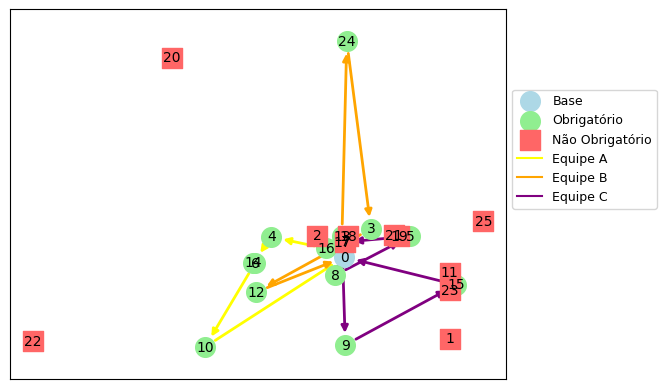

In [27]:
# Inicializando um dicionário para armazenar as soluções por equipe
sol_x_teams_1 = {k: [] for k in K}

# Iterando pelo dicionário da solução e separando as rotas por equipe
for (i, j, k), var in xv.items():
    if var.solution_value > 0.5:  # Verificando se a variável está ativa na solução
        sol_x_teams_1[k].append((i, j))

desenhar_solucao(sol_x_teams_1, coord_x, coord_y)


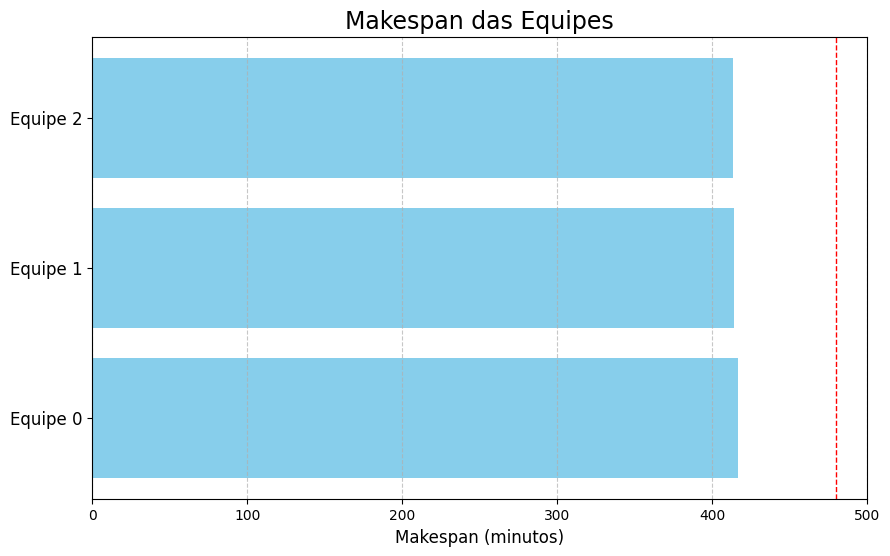

In [28]:
import matplotlib.pyplot as plt

# Extract the makespan values for each team
makespan_values = [solution.get_value(mv[k]) for k in K]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.xlim(0, 500)
plt.axvline(x=480, color='red', linestyle='--', linewidth=1, label='Expediente')
plt.barh(range(len(K)), makespan_values, color='skyblue')
plt.yticks(range(len(K)), [f'Equipe {k}' for k in K], fontsize=12)
plt.xlabel('Makespan (minutos)', fontsize=12)
plt.title('Makespan das Equipes', fontsize=17)
plt.grid(axis='x', linestyle='--', alpha=0.7,)
plt.show()

In [65]:
print("Solution status:")
print(solution.solve_details.status_code, solution.solve_details.status)

Solution status:
101 integer optimal solution


# PCVRP

In [66]:
mdlp = Model("FTSP_PCVRP")

x = {(i, j, k): mdlp.binary_var(name=f"x_{i}_{j}_{k}")
     for i in N for j in N for k in K}

y = {(i, k): mdlp.binary_var(name=f"y_{i}_{k}") for i in N for k in K}

m = {(k): mdlp.continuous_var(name=f"m_{k}") for k in K}

u= {(i): mdlp.continuous_var(name=f"u_{i}") for i in N}

mdlp

docplex.mp.Model['FTSP_PCVRP']

## Restrições PCVPRP

In [67]:
#relacão entre x e y
for i in N:
      if i != 0:
        for k in K:
          mdlp.add_constraint(y[i, k] == mdlp.sum(x[i, j, k] for j in N if j != i), f"constraint_y_{i}_{k}")  

#cada tarefa i é realizada no máximo por uma equipe k e sucedida por 1 tarefa j
for i in N:
  if i != 0:
    mdlp.add_constraint(mdlp.sum(x[i,j,k] for k in K for j in N) <= 1)

#cada equipe k sai e chega 1 vez na base
for k in K:
    mdlp.add_constraint(mdlp.sum(x[0, j, k] for j in N if j != 0) == 1, f"constraint_y_{0}_{k}")
    mdlp.add_constraint(mdlp.sum(x[i, 0, k] for i in N if i != 0) == 1)

#balanceamento entre entradas e saidas
for k in K:
    for i in N:
        if i != 0:
         mdlp.add_constraint(mdlp.sum(x[j, i, k] for j in N if j != i) ==
                           mdlp.sum(x[i, j, k] for j in N if j != i))

#calculo makespan
for k in K:
    mdlp.add_constraint(mdlp.sum(x[i, j, k] * t[i][j] for i in N for j in N if j != i) == m[k])

#expedinte (8 horas = 480 minutos)
for k in K:
    mdlp.add_constraint(m[k] <= 480)

#previne arcos ii
for k in K:
    for i in N:
            mdlp.add_constraint(x[i, i, k] == 0)

#mtz - subtour elimination
n=len(N)
for k in K:
    for i in N:
        for j in N:
            if i != j and i != 0 and j != 0:
                mdlp.add_constraint(u[i]-u[j]+n*x[i,j,k] <= n-1)

#habilidades
for i in N:
    if i != 0:
        for k in K:
            mdlp.add_constraint(y[i,k] <= h[i][k])

#atrbuir x[i, j, k] = 1 se x[i, j, k] > 0.5 na primeira solução - ok
for i in N:
    for j in N:
        if j!=0:
            for k in K:
                if xv[i,j,k].solution_value >= 0.5:
                    mdlp.add_constraint(x[i,j,k] == 1, f"constraint_x_{i}_{j}_{k}_1")


# Atribuir y[i, k] = 1 se y[i, k] > 0.5 na primeira solução - ok
for i in N:
    for k in K:
        if yv[i,k].solution_value >= 0.5:
            mdlp.add_constraint(y[i,k] == 1, f"constraint_y_{i}_{k}_1")

'''
list = [x[0, 30, 0], x[30, 35, 0], x[35, 27, 0],
        x[0,10,1], x[10,15,1], x[15,3,1], x[3,17,1], x[17,14,1], x[14,26,1], x[26,16,1],
        x[0,8,2], x[8,29,2], x[29,31,2], x[31,33,2],
        x[0,9,3], x[9,28,3], x[28,32,3],
        x[0,5,4], x[5,7,4], x[7,12,4], x[12,13,4], x[13,6,4], x[6,24,4], x[24,4,4],
        y[30,0], y[35,0], y[27,0],
        y[10,1], y[15,1], y[3,1], y[17,1], y[14,1], y[26,1], y[16,1],
        y[8,2], y[29,2], y[31,2], y[33,2],
        y[9,3], y[28,3], y[32,3],
        y[5,4], y[7,4], y[12,4], y[13,4], y[6,4], y[24,4], y[4,4]]

for i in list:
    mdlp.add_constraint(i == 1)
'''

'\nlist = [x[0, 30, 0], x[30, 35, 0], x[35, 27, 0],\n        x[0,10,1], x[10,15,1], x[15,3,1], x[3,17,1], x[17,14,1], x[14,26,1], x[26,16,1],\n        x[0,8,2], x[8,29,2], x[29,31,2], x[31,33,2],\n        x[0,9,3], x[9,28,3], x[28,32,3],\n        x[0,5,4], x[5,7,4], x[7,12,4], x[12,13,4], x[13,6,4], x[6,24,4], x[24,4,4],\n        y[30,0], y[35,0], y[27,0],\n        y[10,1], y[15,1], y[3,1], y[17,1], y[14,1], y[26,1], y[16,1],\n        y[8,2], y[29,2], y[31,2], y[33,2],\n        y[9,3], y[28,3], y[32,3],\n        y[5,4], y[7,4], y[12,4], y[13,4], y[6,4], y[24,4], y[4,4]]\n\nfor i in list:\n    mdlp.add_constraint(i == 1)\n'

In [68]:
mdlp.maximize(mdlp.sum(y[i,k]*p[i] for i in N for k in K))

In [69]:
mdlp.context.solver.log_output = True
solution_p = mdlp.solve(time_limit=3600)

Version identifier: 22.1.1.0 | 2022-11-27 | 9160aff4d
CPXPARAM_Read_DataCheck                          1
CPXPARAM_TimeLimit                               3600
Tried aggregator 2 times.
MIP Presolve eliminated 1551 rows and 2089 columns.
MIP Presolve modified 28 coefficients.
Aggregator did 12 substitutions.
Reduced MIP has 605 rows, 34 columns, and 1220 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.01 sec. (3.93 ticks)
Found incumbent of value 84.000000 after 0.03 sec. (5.45 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Tried aggregator 1 time.
Detecting symmetries...
MIP Presolve added 28 rows and 0 columns.


Reduced MIP has 633 rows, 34 columns, and 1276 nonzeros.
Reduced MIP has 9 binaries, 0 generals, 0 SOSs, and 0 indicators.
Presolve time = 0.02 sec. (0.79 ticks)
Probing time = 0.00 sec. (0.02 ticks)
Clique table members: 5.
MIP emphasis: balance optimality and feasibility.
MIP search method: dynamic search.
Parallel mode: deterministic, using up to 8 threads.
Root relaxation solution time = 0.00 sec. (0.96 ticks)

        Nodes                                         Cuts/
   Node  Left     Objective  IInf  Best Integer    Best Bound    ItCnt     Gap

*     0+    0                           84.0000      111.0000            32.14%
      0     0      100.0000     4       84.0000      100.0000        7   19.05%
*     0+    0                           91.0000      100.0000             9.89%
*     0+    0                          100.0000      100.0000             0.00%
      0     0        cutoff            100.0000      100.0000        7    0.00%
Elapsed time = 0.08 sec. (8.63 ticks, tre

In [70]:
# Exibir a solução
if solution_p:
    solution_p.display()
else:
    print("Nenhuma solução encontrada")

solution for: FTSP_PCVRP
objective: 100
status: OPTIMAL_SOLUTION(2)
x_0_8_2 = 1
x_0_13_1 = 1
x_0_16_0 = 1
x_1_0_2 = 1
x_3_12_1 = 1
x_4_14_0 = 1
x_5_17_2 = 1
x_6_10_0 = 1
x_8_5_2 = 1
x_9_15_2 = 1
x_10_22_0 = 1
x_12_21_1 = 1
x_13_24_1 = 1
x_14_6_0 = 1
x_15_1_2 = 1
x_16_4_0 = 1
x_17_9_2 = 1
x_21_0_1 = 1
x_22_0_0 = 1
x_24_3_1 = 1
y_1_2 = 1
y_3_1 = 1
y_4_0 = 1
y_5_2 = 1
y_6_0 = 1
y_8_2 = 1
y_9_2 = 1
y_10_0 = 1
y_12_1 = 1
y_13_1 = 1
y_14_0 = 1
y_15_2 = 1
y_16_0 = 1
y_17_2 = 1
y_21_1 = 1
y_22_0 = 1
y_24_1 = 1
m_0 = 476.250
m_1 = 470.220
m_2 = 475.730
u_1 = 5.000
u_3 = 2.000
u_4 = 1.000
u_5 = 1.000
u_6 = 3.000
u_9 = 3.000
u_10 = 4.000
u_12 = 3.000
u_14 = 2.000
u_15 = 4.000
u_17 = 2.000
u_21 = 4.000
u_22 = 5.000
u_24 = 1.000


In [71]:
# Initialize dictionaries to store solutions for each team
sol_x_teams_2 = {k: {} for k in K}

# Iterate through the solution dictionary and separate by team
for (i, j, k), var in x.items():
    if solution_p.get_value(var) > 0.5:  # Assuming binary variables, check if the value is 1
        sol_x_teams_2[k][(i, j)] = solution_p.get_value(var)

# Print the solutions for each team
for k in K:
    print(f"Solutions for team {k}:")
    for (i, j), value in sol_x_teams_2[k].items():
        print(f"x[{i}, {j}, {k}] = {value}")

Solutions for team 0:
x[0, 16, 0] = 1.0
x[4, 14, 0] = 1.0
x[6, 10, 0] = 1.0
x[10, 22, 0] = 1.0
x[14, 6, 0] = 1.0
x[16, 4, 0] = 1.0
x[22, 0, 0] = 1.0
Solutions for team 1:
x[0, 13, 1] = 1.0
x[3, 12, 1] = 1.0
x[12, 21, 1] = 1.0
x[13, 24, 1] = 1.0
x[21, 0, 1] = 1.0
x[24, 3, 1] = 1.0
Solutions for team 2:
x[0, 8, 2] = 1.0
x[1, 0, 2] = 1.0
x[5, 17, 2] = 1.0
x[8, 5, 2] = 1.0
x[9, 15, 2] = 1.0
x[15, 1, 2] = 1.0
x[17, 9, 2] = 1.0


In [72]:
# Inicializa o dicionário para armazenar os caminhos de todas as equipes
team_paths_PCVRP = {}
for k in K:
    team_paths_PCVRP[k] = get_team_path(sol_x_teams_2[k])
    print(f"Rota da equipe {k}: {team_paths_PCVRP[k]}")

Rota da equipe 0: [0, 16, 4, 14, 6, 10, 22, 0]
Rota da equipe 1: [0, 13, 24, 3, 12, 21, 0]
Rota da equipe 2: [0, 8, 5, 17, 9, 15, 1, 0]


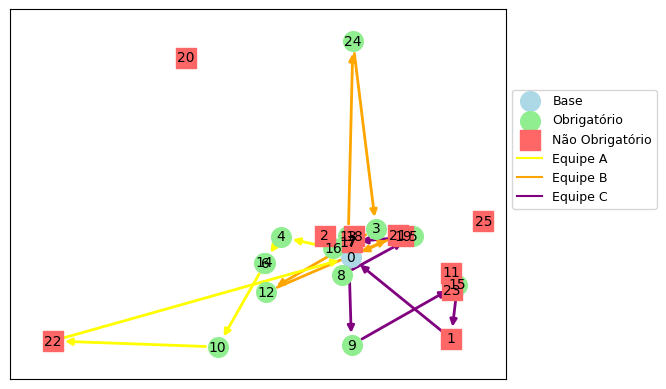

In [73]:
# Inicializando um dicionário para armazenar as soluções por equipe
sol_x_teams_3 = {k: [] for k in K}

# Iterando pelo dicionário da solução e separando as rotas por equipe
for (i, j, k), var in x.items():
    if var.solution_value > 0.5:  # Verificando se a variável está ativa na solução
        sol_x_teams_3[k].append((i, j))

desenhar_solucao(sol_x_teams_3, coord_x, coord_y)

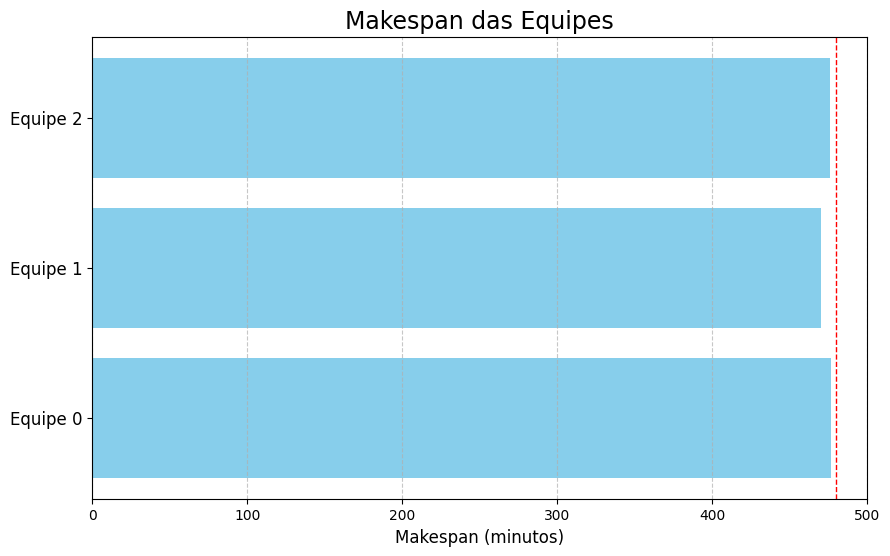

In [87]:
import matplotlib.pyplot as plt

# Extract the makespan values for each team
makespan_values = [solution_p.get_value(m[k]) for k in K]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.xlim(0, 500)
plt.axvline(x=480, color='red', linestyle='--', linewidth=1, label='Expediente')
plt.barh(range(len(K)), makespan_values, color='skyblue')
plt.yticks(range(len(K)), [f'Equipe {k}' for k in K], fontsize=12)
plt.xlabel('Makespan (minutos)', fontsize=12)
plt.title('Makespan das Equipes',fontsize=17)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

In [75]:
# Verificar se a solução foi encontrada e exibir o valor da função objetivo
if solution_p:
    print("Valor da solução encontrada:", solution_p.objective_value)
else:
    print("Nenhuma solução encontrada")

Valor da solução encontrada: 100.0


In [76]:
print(solution_p.solve_details.status_code, solution_p.solve_details.status)

101 integer optimal solution
